In [1]:
import os
import time
import shutil
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
from webdriver_manager.chrome import ChromeDriverManager

# 🔹 다운로드 경로 설정
download_dir = r"C:\Users\user\Downloads"  # 기본 다운로드 폴더
destination_dir = r"C:\Users\user\btc\btc-auto-trader"  # 최종 저장 폴더. 사용 시 다운로드 폴더 위치 변경 필요요

# 🔹 Chrome 옵션 설정
chrome_options = Options()
chrome_options.add_experimental_option("prefs", {
    "download.default_directory": download_dir,  # 다운로드 경로 설정
    "download.prompt_for_download": False,  # 다운로드 시 확인창 비활성화
    "directory_upgrade": True,
    "safebrowsing.enabled": True
})

# 🔹 Chrome WebDriver 실행
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

try:
    # 🔹 MVRV 데이터 페이지 열기
    url = "https://www.blockchain.com/explorer/charts/mvrv"
    driver.get(url)

    # 🔹 페이지 로딩 대기
    time.sleep(5)

    # 🔹 "All" 버튼 클릭 (전체 기간 선택)
    try:
        all_button = driver.find_element(By.XPATH, "//button[contains(text(), '3Y')]")
        ActionChains(driver).move_to_element(all_button).click().perform()
        print("✅ 'All' 버튼 클릭 완료")
    except Exception as e:
        print("⚠ 'All' 버튼 클릭 실패:", e)

    # 🔹 "Download JSON" 버튼 클릭
    time.sleep(10)  # 버튼 활성화 대기
    try:
        download_button = driver.find_element(By.XPATH, "//div[contains(text(), 'Download JSON')]")
        ActionChains(driver).move_to_element(download_button).click().perform()
        print("✅ 'Download JSON' 버튼 클릭 완료")
    except Exception as e:
        print("⚠ 'Download JSON' 버튼 클릭 실패:", e)

    # 🔹 다운로드 완료 대기
    time.sleep(10)

    # 🔹 다운로드된 JSON 파일 찾기 및 이동
    downloaded_files = [f for f in os.listdir(download_dir) if f.endswith('.json')]
    if downloaded_files:
        latest_file = max([os.path.join(download_dir, f) for f in downloaded_files], key=os.path.getctime)
        shutil.move(latest_file, os.path.join(destination_dir, os.path.basename(latest_file)))
        print(f"✅ 파일이 성공적으로 이동됨: {latest_file} → {destination_dir}")
    else:
        print("⚠ 다운로드된 JSON 파일을 찾을 수 없음.")

finally:
    # 🔹 브라우저 종료
    driver.quit()

✅ 'All' 버튼 클릭 완료
✅ 'Download JSON' 버튼 클릭 완료
✅ 파일이 성공적으로 이동됨: C:\Users\user\Downloads\mvrv.json → C:\Users\user\btc\btc-auto-trader


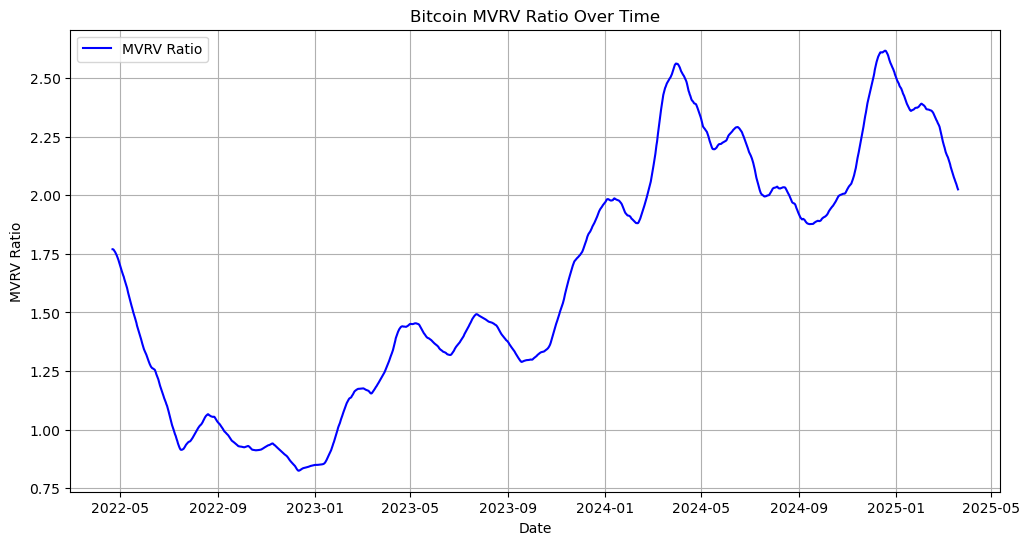

MVRV Ratio 데이터가 CSV 파일로 저장되었습니다: ./mvrv_ratio.csv


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로
file_path = "./mvrv.json"

# JSON 파일 로드
with open(file_path, "r") as file:
    data = json.load(file)

# MVRV 데이터 추출
mvrv_data = data["mvrv"]
df = pd.DataFrame(mvrv_data)

# 타임스탬프를 날짜로 변환
df["date"] = pd.to_datetime(df["x"], unit="ms")
df["MVRV"] = df["y"]
df = df[["date", "MVRV"]]  # 필요한 컬럼만 유지

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["MVRV"], label="MVRV Ratio", color="blue")
plt.xlabel("Date")
plt.ylabel("MVRV Ratio")
plt.title("Bitcoin MVRV Ratio Over Time")
plt.legend()
plt.grid()
plt.show()

# CSV 파일 저장
csv_path = "./mvrv_ratio.csv"
df.to_csv(csv_path, index=False)
print(f"MVRV Ratio 데이터가 CSV 파일로 저장되었습니다: {csv_path}")